# SCENARIO

A/B Testing Landing Pages

# OBJECTIVE 

Determine which of two landing pages (Page A or Page B) results in a higher conversion rate.

# IMPORT THE REQUIRED LIBRARIES

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# GENERATE SYNTHETIC DATA

In [17]:
import pandas as pd
import numpy as np
np.random.seed(30)
num_users = 500
data = {
    'user_id': range(1, num_users + 1),
    'page_version': np.random.choice(['A', 'B'], size=num_users),
    'converted': np.concatenate([np.random.binomial(1, 0.25, num_users // 2),
                                 np.random.binomial(1, 0.35, num_users // 2)])}

df = pd.DataFrame(data)

# VISUALISE DATA

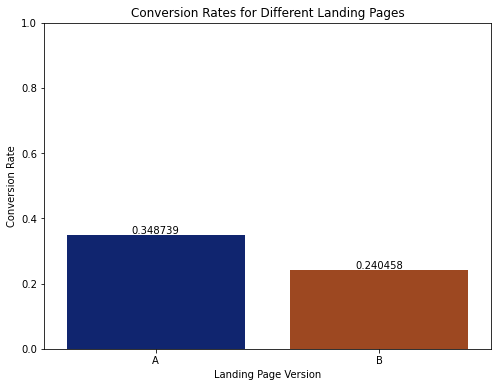

In [25]:
conversion_rates = df.groupby('page_version')['converted'].mean().reset_index()
conversion_rates.columns = ['Page Version', 'Conversion Rate']
plt.figure(figsize=(8, 6))
plot=sns.barplot(x='Page Version', y='Conversion Rate', data=conversion_rates, palette='dark')
plot.bar_label(plot.containers[0])
plt.title('Conversion Rates for Different Landing Pages')
plt.ylabel('Conversion Rate')
plt.xlabel('Landing Page Version')
plt.ylim(0, 1)
plt.show()

In [20]:
from scipy import stats
contingency_table = pd.crosstab(df['page_version'], df['converted'])
print(contingency_table)
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
alpha = 0.05
if p < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

converted       0   1
page_version         
A             155  83
B             199  63
Chi-Square Statistic: 6.56
P-Value: 0.0104
The difference is statistically significant.
